## <b> Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from openpyxl import load_workbook
from matplotlib.gridspec import GridSpec
import os

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
print(pd.__version__)

2.0.1


## <b> load and process data

In [4]:
df = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/raw_files/hits.csv')
#df = df.set_index('Strain')
print(df.shape)
df.head()

(950, 170)


,Strain,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,ST001670050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Add ST column
t_d = df.copy()
t_d['ST'] = t_d.Strain.str[2:-4].astype(int)
first_column = t_d.pop('ST')
t_d.insert(0, 'ST', first_column)
t_d.head(3)

,ST,Strain,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,167,ST001670050,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,648,ST006480109,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,73,ST000730234,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
t_d = t_d.set_index(['Strain', 'ST'])
t_d.head()

,,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,10H-HipA_C-Couple_hipA,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
Strain,ST,,,,,,,,,,,,,,,,,,,,,
ST001670050,167,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ST006480109,648,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ST000730234,73,2,1,1,1,1,1,1,1,3,0,...,0,0,0,0,0,0,0,0,0,0
ST000580141,58,0,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
ST000380050,38,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#maximum copy number per hit
max_copy = t_d.max().to_frame(name = "max_copy_no")
max_copy.head()
#dataframe with copynumber>=2
max_copy = max_copy.loc[max_copy['max_copy_no'] >=3]
print(max_copy .shape)
max_copy

(11, 1)


,max_copy_no
1H-CbtA_toxin,8
9H-YdaT_toxin,6
17H-YdaT_toxin,3
19H-PIN,3
22H-PemK_toxin,4
29H-PIN,3
36H-Fic,3
39H-CbtA_toxin,3
40H-ParE_toxin,3
70H-YafO_toxin,3


In [8]:
#list of columns with copy no atleast 3
list_cols = max_copy.index

In [9]:
list_cols

Index(['1H-CbtA_toxin', '9H-YdaT_toxin', '17H-YdaT_toxin', '19H-PIN',
       '22H-PemK_toxin', '29H-PIN', '36H-Fic', '39H-CbtA_toxin',
       '40H-ParE_toxin', '70H-YafO_toxin', '90H-CcdB'],
      dtype='object')

In [10]:
#this is a dataframe where toxins have copynumber 3 as well as above
t_d = t_d[list_cols]

In [11]:
print(t_d.shape)
t_d.head()

(950, 11)


,,1H-CbtA_toxin,9H-YdaT_toxin,17H-YdaT_toxin,19H-PIN,22H-PemK_toxin,29H-PIN,36H-Fic,39H-CbtA_toxin,40H-ParE_toxin,70H-YafO_toxin,90H-CcdB
Strain,ST,,,,,,,,,,,
ST001670050,167,2,1,0,0,0,0,0,1,1,0,0
ST006480109,648,1,1,1,0,0,0,0,0,0,0,0
ST000730234,73,2,3,0,0,0,0,0,1,0,0,0
ST000580141,58,0,0,0,2,0,0,0,0,0,0,0
ST000380050,38,2,1,1,0,1,0,1,0,1,0,0


In [12]:
#for saving into different csv files for writing in paper
def save_individual_dfs_for_paper(df, output_dir):
    df_1 = df.copy()
    for col in df.columns:
        k = df_1[col].to_frame(name=col)
        k = k.reset_index()
        k = k.drop('Strain', axis=1)
        mask = k[col] >= 4
        #k.loc[mask, col] = '>=4'
        #print(k)
        k['COUNTER'] = 1
        group_data = k.groupby(['ST', col])['COUNTER'].size().unstack().reset_index()
        toks = col.strip().split('-')
        df_name = toks[-1] + '_' + toks[0] 
        print(df_name)
        group_data.to_csv(output_dir + '/' + df_name + '.csv', index=False)

In [13]:
save_individual_dfs_for_paper(t_d,"/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/results/toxin-wise_dfcopy_number/for_paper")

CbtA_toxin_1H
YdaT_toxin_9H
YdaT_toxin_17H
PIN_19H
PemK_toxin_22H
PIN_29H
Fic_36H
CbtA_toxin_39H
ParE_toxin_40H
YafO_toxin_70H
CcdB_90H


In [14]:
folder_path = '/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/results/toxin-wise_dfcopy_number/for_paper/'
file_list = os.listdir(folder_path)
print(file_list)
excel_writer = pd.ExcelWriter('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/results/toxin_copynumber.xlsx', engine='xlsxwriter')

for file_name in file_list:
    if file_name.endswith('.csv'): 
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)
        sheet_name = os.path.splitext(file_name)[0]
        data.to_excel(excel_writer, sheet_name=sheet_name, index=False)
excel_writer.close()


['ParE_toxin_40H.csv', 'CbtA_toxin_39H.csv', 'CbtA_toxin_1H.csv', 'YafO_toxin_70H.csv', 'YdaT_toxin_17H.csv', 'PIN_29H.csv', 'PemK_toxin_22H.csv', 'Fic_36H.csv', 'CcdB_90H.csv', 'PIN_19H.csv', 'YdaT_toxin_9H.csv']


In [15]:
folder_path = '/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/results/toxin-wise_dfcopy_number/for_paper/'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
print(file_list)

# Create a Pandas Excel writer object
excel_writer = pd.ExcelWriter('output_file.xlsx', engine='xlsxwriter')

# Loop through each CSV file in the folder
for file_name in file_list:
    if file_name.endswith('.csv'):  # Process only CSV files
        # Read the CSV file into a Pandas DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # Extract the file name (without extension) for the Excel sheet name
        sheet_name = os.path.splitext(file_name)[0]
        
        # Write the DataFrame to an Excel sheet
        df.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the Excel file
excel_writer.close()


['ParE_toxin_40H.csv', 'CbtA_toxin_39H.csv', 'CbtA_toxin_1H.csv', 'YafO_toxin_70H.csv', 'YdaT_toxin_17H.csv', 'PIN_29H.csv', 'PemK_toxin_22H.csv', 'Fic_36H.csv', 'CcdB_90H.csv', 'PIN_19H.csv', 'YdaT_toxin_9H.csv']


In [16]:
#for saving into different csv files for image
def save_individual_dfs_for_image(df, output_dir):
    df_1 = df.copy()
    for col in df.columns:
        k = df_1[col].to_frame(name=col)
        k = k.reset_index()
        k = k.drop('Strain', axis=1)
        mask = k[col] >= 4
        k.loc[mask, col] = '>=4'
        #print(k)
        k['COUNTER'] = 1
        group_data = k.groupby(['ST', col])['COUNTER'].size().unstack().reset_index()
        toks = col.strip().split('-')
        df_name = toks[-1] + '_' + toks[0] 
        print(df_name)
        group_data.to_csv(output_dir + '/' + df_name + '.csv', index=False)

In [17]:
save_individual_dfs_for_image(t_d,"/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/results/toxin-wise_dfcopy_number/for_image")

CbtA_toxin_1H
YdaT_toxin_9H
YdaT_toxin_17H
PIN_19H
PemK_toxin_22H
PIN_29H
Fic_36H
CbtA_toxin_39H
ParE_toxin_40H
YafO_toxin_70H
CcdB_90H


In [18]:
import pandas as pd

toxin_list = ['CbtA_toxin_1H', 'YdaT_toxin_9H', 'YdaT_toxin_17H', 'PIN_19H', 'PemK_toxin_22H', 'PIN_29H',
              'Fic_36H', 'CbtA_toxin_39H', 'ParE_toxin_40H', 'YafO_toxin_70H', 'CcdB_90H']
dfs = []

for toxin in toxin_list:
    path = "/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/results/toxin-wise_dfcopy_number/for_image/"
    df = pd.read_csv(path + toxin + ".csv")
    df['ST'] = 'ST' + df['ST'].astype(str)
    df = df.set_index('ST')
    # define ST order
    ST_new_order = ['ST11', 'ST10', 'ST48', 'ST167', 'ST410', 'ST58', 'ST101',
                'ST155', 'ST156', 'ST117', 'ST648', 'ST38', 'ST69',
                'ST405', 'ST12', 'ST73', 'ST95', 'ST127', 'ST131']
    df = df.reindex(ST_new_order)
    df.columns = df.columns.astype(str)
    dfs.append(df)

    
# View the first 5 rows of CbtA_toxin_1H
print(dfs[0].head())



          0     1     2    3  >=4
ST                               
ST11    1.0  44.0   5.0  NaN  NaN
ST10    5.0  43.0   1.0  1.0  NaN
ST48   23.0  18.0   9.0  NaN  NaN
ST167   6.0  17.0  26.0  NaN  1.0
ST410  19.0  20.0  10.0  1.0  NaN


In [19]:
dfs[0].columns

Index(['0', '1', '2', '3', '>=4'], dtype='object')

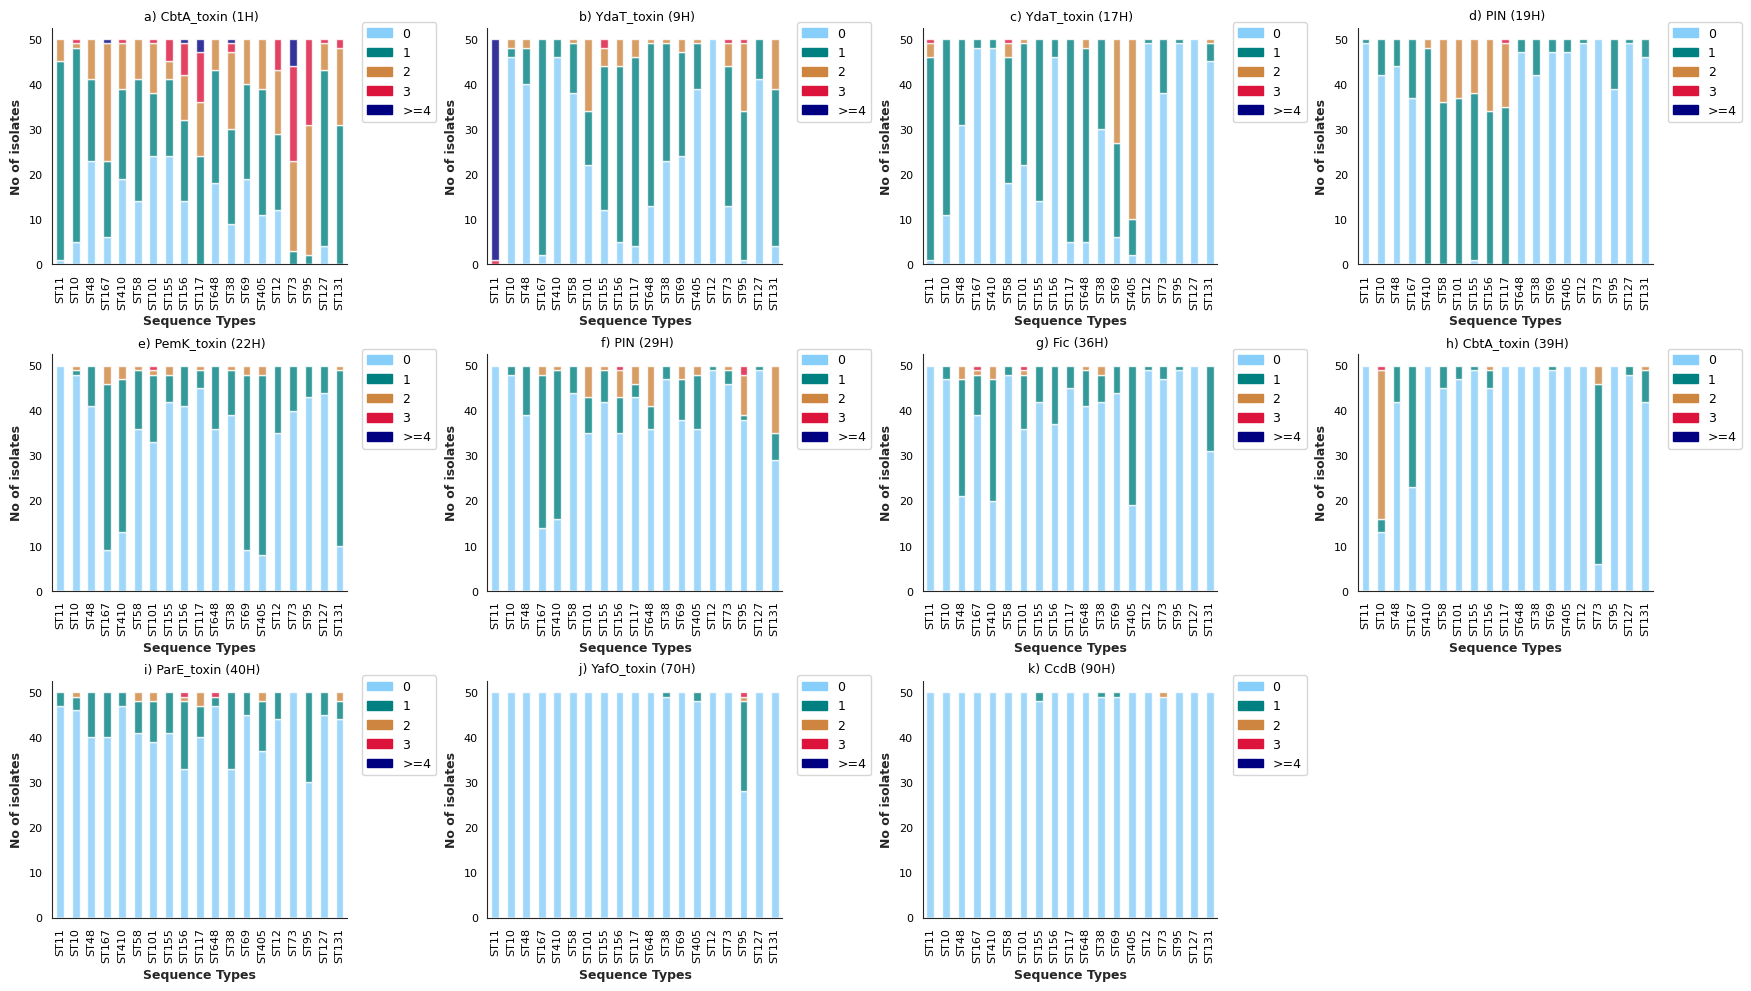

In [21]:
#stacked barplots
fig = plt.figure(figsize=(17.4, 9.8), layout="constrained")
sns.set_style("white")

#fig.suptitle('Stacked barplots representing copy no of toxins stratifed by sequence types', fontsize=12)

#two rows and two columns
gs = GridSpec(nrows=3, ncols=4, figure=fig)

# Define the color palette
colors = ["lightskyblue", "teal", "peru","crimson","navy"]


#define subplot 
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1 ])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[1,3])
ax8 = fig.add_subplot(gs[2,0 ])
ax9 = fig.add_subplot(gs[2,1 ])
ax10 = fig.add_subplot(gs[2,2 ])

# Define the desired bar width
bar_width = 0.5
#define axes
axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10] 

#plot data
for i, df in enumerate(dfs):
    df.plot(ax=vars()[f"ax{i}"], kind='bar', stacked=True, color=colors, width = bar_width, alpha= 0.8 )

#define axes
axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10] 


#Add titles to subplots
toxin__titles = ['a) CbtA_toxin (1H)', 'b) YdaT_toxin (9H)', 'c) YdaT_toxin (17H)', 'd) PIN (19H)', 'e) PemK_toxin (22H)', 'f) PIN (29H)',
              'g) Fic (36H)', 'h) CbtA_toxin (39H)', 'i) ParE_toxin (40H)', 'j) YafO_toxin (70H)', 'k) CcdB (90H)']

for i, ax in enumerate(axes):
    ax.set_title(f" {toxin__titles[i]}", fontsize=9, color = 'black')


#Add x label to all the subplots
for ax in axes:
    ax.set_xlabel('Sequence Types', fontsize = 9, weight = 'bold')
    ax.set_ylabel('No of isolates', fontsize = 9, weight = 'bold')
    ax.tick_params(axis='x',rotation=90, labelsize = 8, colors='black')
    ax.tick_params(axis='y', labelsize = 8, colors='black')
    #ax.legend(bbox_to_anchor=(1.03, 1.05), fontsize = 7)
    #despine all axes
    sns.despine()
    
import matplotlib.patches as mpatches


import matplotlib.patches as mpatches
for ax in axes:

    # Define the colors and labels
    colors = {"lightskyblue":'0', "teal" : '1', "peru": '2',"crimson": '3',"navy":'>=4'}

    # Create a list of patches for the legend
    legend_patches = []
    
    # Iterate through the colors dictionary and create a patch for each color with its corresponding label
    for color, label in colors.items():
        patch = mpatches.Patch(color=color, label=label)
        legend_patches.append(patch)

    # Add the legend to the axis
    l = ax.legend(handles=legend_patches, bbox_to_anchor=(1.03, 1.05), fontsize = 9)
    for text in l.get_texts():
        text.set_color("black")

    

#Add phylogroups of the respective STs above bars          
#for i, ax in enumerate(axes):
    #positions = [(-0.6, 168), (13.2, 168), (24.9, 168), (36.2, 168), (48.5, 168), (61.5, 168), (73.5, 168),
                #(86, 168), (98, 168), (108.5, 168), (120.5, 168), (132, 168), (145.5, 168), (155.5, 168), (170, 168),
                #(182, 168), (194.5, 168), (206, 168), (218, 168)]
    #for j, label in enumerate(['E', 'A', 'A', 'A', 'C', 'B1', 'B1', 'B1', 'B1', 'G', 'F', 'D','D','D',
                              #'B2','B2','B2','B2','B2']):
        #ax.annotate(label, xy=(0, 0), xytext=positions[j], textcoords='offset points',
                    #fontsize=7, ha='center', va='bottom', fontweight='bold' )#


#save plots
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/publication/stacked_barplots.tiff', dpi=300)
#save plots
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/pmrf_review/stacked_barplots.tiff', dpi=300)
#save plots
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/stacked_barplots.tiff', dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/main_images/Fig4.tiff', dpi=300)
plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/rebuttal/Revised_Images/Fig4_revised.tiff', dpi=300)